# Определение возраста покупателей

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

    Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
    Контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

## Задачи проекта
### [Шаг 1. Проведите исследовательский анализ набора фотографий, Подготовьте данные к обучению](#step1)


### [Шаг 2. Обучите нейронную сеть и рассчитайте её качество.](#step3)


### [Шаг 3. Вывод](#step4)



## Исследовательский анализ данных<a id='step1'></a>

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [3]:
labels

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


In [4]:
def get_info(df):
    print(df.info())
    print(df.describe())
    print(df.duplicated().sum())
    
    

In [5]:
get_info(labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
file_name    7591 non-null object
real_age     7591 non-null int64
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None
          real_age
count  7591.000000
mean     31.201159
std      17.145060
min       1.000000
25%      20.000000
50%      29.000000
75%      41.000000
max     100.000000
0


Выбросов и дубликатов не обнаружено. Возраст распределен в корректных значений.

### Рассмотрим график распределения возраста

In [6]:
def dist_boxen_plot(series):
    plt.figure(figsize=(16, 12))

    plt.subplot(211)
    plt.title('График распределения возраста')
    sns.distplot(series, bins=int(round(series.max() - series.min(), 0)), kde=False)
    plt.xticks(np.arange(0, int(series.max()), 3))

    plt.subplot(212)
    plt.title('Диаграмма распределения выборки')
    sns.boxenplot(series)
    plt.xticks(np.arange(0, int(series.max()), 3))

    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


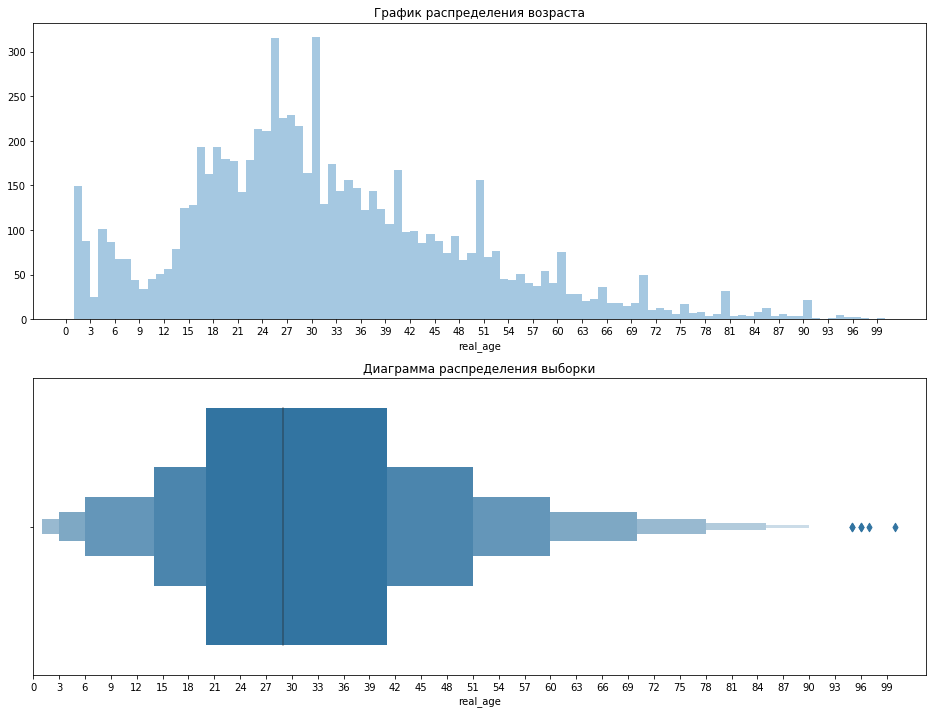

In [7]:
dist_boxen_plot(labels['real_age'])

In [8]:
labels['real_age'].value_counts()

30     317
25     315
27     229
26     226
28     217
      ... 
96       2
100      1
93       1
91       1
97       1
Name: real_age, Length: 97, dtype: int64

In [9]:
pd.cut(labels['real_age'], bins=20).value_counts()

(25.75, 30.7]     1153
(20.8, 25.75]     1061
(15.85, 20.8]      907
(30.7, 35.65]      750
(35.65, 40.6]      664
(40.6, 45.55]      466
(45.55, 50.5]      463
(0.901, 5.95]      450
(10.9, 15.85]      439
(50.5, 55.45]      286
(5.95, 10.9]       258
(55.45, 60.4]      248
(60.4, 65.35]      135
(65.35, 70.3]      119
(70.3, 75.25]       56
(75.25, 80.2]       55
(85.15, 90.1]       37
(80.2, 85.15]       31
(90.1, 95.05]        9
(95.05, 100.0]       4
Name: real_age, dtype: int64

<p>Чаще всего в выборке встречаются люди возрастом от 25 до 30. С точки зрения задачи проекта нам не особо интересна категория детей (от 0 до 7), поскольку в большинстве случаев она не совершает покупки самостоятельно. </p>
<p>Стоит отметить, что в текущем датасете для некоторых сегментов возрастов слишком мало фотографий, и есть вероятность, что модель будет ошибаться при их распозновании. </p>
<p>Важно отметить, что на графике распределения видны пики каждые 10 лет. Вероятнее всего эти пики связаны с неточной информацией первоисточника - то есть встречаются фотографии, на которых может быть изображен мужчина 52 лет, но на фото его дата указана 50. Таким образом, возраст округляют к ближайшему десятилетию, и в итоге увеличивается кол-во объектов с таким значением. Это может привести к ошибке при обучении - человек с возрастом 35 может быть определен как 30 или 40-летний.</p>



### Выведем фотографии:

In [10]:
features, target = next(train_gen_flow)

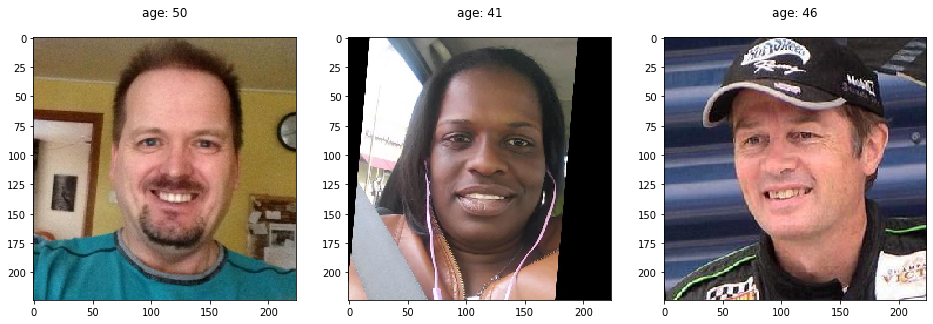

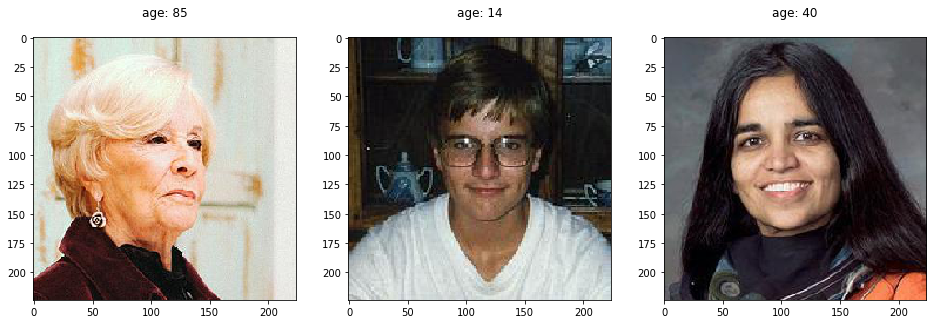

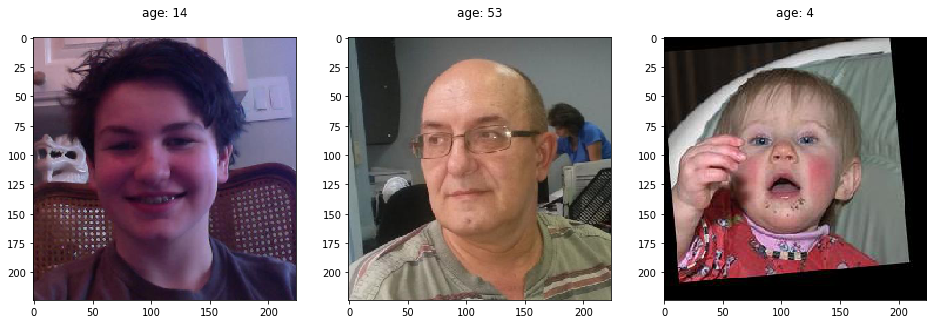

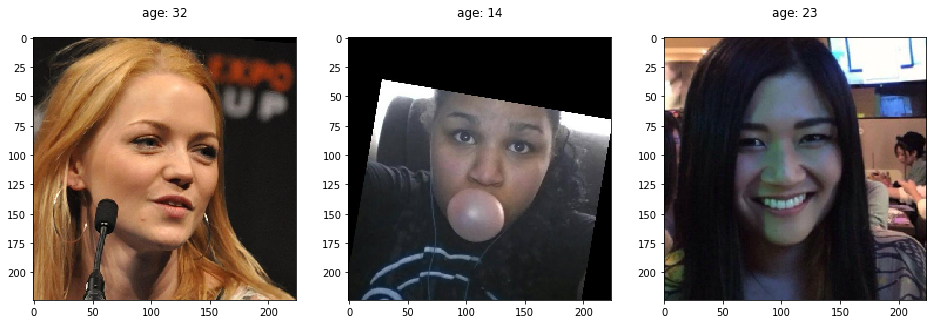

In [11]:
for i in range(0, 12, 3):
    plt.figure(figsize=(16, 6))
    
    for j in range(3):
        plt.subplot(131+j)
        plt.title(f'age: {target[i+j]}\n')
        plt.imshow(features[i+j])
    
    plt.show()

<p>Поскольку некоторые возрастные группы имеют всего лишь несколькими фотографий, то могут быть проблемы при обучении модели. Если результаты будут неудовлетворительными, можно попробовать применить аугментацию: поворачивать, отражать, смещать фотографии. Возраст человека на фото от таких манипуляций не изменится. Применять сжатие и растягивание не рекомендуется, а вот прибегкнуть к повышению четкости можно.</p>
<p>После результатов обучения без аугментации будет принято решение о ее необходимости.</p>

## Обучение модели<a id='step3'></a>

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd


def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')

    datagen = ImageDataGenerator(validation_split=0.25, rescale=1. / 255.)

    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size=(244, 244),
        batch_size=32,
        subset='training',
        class_mode='raw',
        seed=12345)

    return train_datagen_flow


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')

    datagen = ImageDataGenerator(validation_split=0.25, rescale=1. / 255.)

    test_datagen_flow = datagen.flow_from_dataframe(
        dataframe = labels,
        directory = path + 'final_files/',
        x_col = 'file_name',
        y_col = 'real_age',
        target_size=(244, 244),
        batch_size=32,
        subset='validation',
        class_mode='raw',
        seed=12345)

    return test_datagen_flow


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)

    model = Sequential()
    model.add(backbone)

    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0003)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model
```

### Лог кода

```
Epoch 1/10

2021-04-01 15:52:32.155018: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10

2021-04-01 15:52:32.484644: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7

178/178 - 65s - loss: 193.8973 - mae: 10.2292 - val_loss: 527.5471 - val_mae: 17.8959

Epoch 2/10

178/178 - 41s - loss: 85.4746 - mae: 6.9560 - val_loss: 474.4240 - val_mae: 16.6778

Epoch 3/10

178/178 - 40s - loss: 52.0402 - mae: 5.5313 - val_loss: 314.0174 - val_mae: 13.2025

Epoch 4/10

178/178 - 41s - loss: 30.3044 - mae: 4.2248 - val_loss: 156.7206 - val_mae: 9.8358

Epoch 5/10

178/178 - 41s - loss: 21.5816 - mae: 3.5652 - val_loss: 82.5695 - val_mae: 6.8216

Epoch 6/10

178/178 - 41s - loss: 16.3811 - mae: 3.1100 - val_loss: 70.5185 - val_mae: 6.4530

Epoch 7/10

178/178 - 40s - loss: 12.7498 - mae: 2.7719 - val_loss: 82.2211 - val_mae: 6.6691

Epoch 8/10

178/178 - 41s - loss: 11.0358 - mae: 2.5372 - val_loss: 71.1154 - val_mae: 6.2844

Epoch 9/10

178/178 - 40s - loss: 8.5555 - mae: 2.2441 - val_loss: 77.3393 - val_mae: 6.4602

Epoch 10/10

178/178 - 40s - loss: 8.3509 - mae: 2.2276 - val_loss: 76.2366 - val_mae: 6.7374

```

## Анализ обученной модели

Подготовим таблицу с результатами:

In [12]:
model_data = [
    [193.8973, 10.2292, 527.5471, 17.8959],
    [ 85.4746, 6.9560, 474.4240, 16.6778],
    [ 52.0402, 5.5313, 314.0174, 13.2025],
    [ 30.3044, 4.2248, 156.7206,  9.8358],
    [ 21.5816, 3.5652,  82.5695,  6.8216],
    [ 16.3811, 3.1100,  70.5185,  6.4530],
    [ 12.7498, 2.7719,  82.2211,  6.6691],
    [ 11.0358, 2.5372,  71.1154,  6.2844],
    [ 8.5555, 2.2441,  77.3393,  6.4602],
    [  8.3509, 2.2276,  76.2366,  6.7374]
]

model_columns = ['loss', 'mae', 'val_loss', 'val_mae']

df = pd.DataFrame(data=model_data,
                                          columns=model_columns,
                                          index=np.linspace(1, 10, 10).astype('int')
                                         )
df

,loss,mae,val_loss,val_mae
1,193.8973,10.2292,527.5471,17.8959
2,85.4746,6.9560,474.4240,16.6778
3,52.0402,5.5313,314.0174,13.2025
4,30.3044,4.2248,156.7206,9.8358
5,21.5816,3.5652,82.5695,6.8216
6,16.3811,3.1100,70.5185,6.4530
7,12.7498,2.7719,82.2211,6.6691
8,11.0358,2.5372,71.1154,6.2844
9,8.5555,2.2441,77.3393,6.4602
10,8.3509,2.2276,76.2366,6.7374


Рассчитаем таблицу скорость схождения рядов значений функции потерь MSE и метрики MAE .


In [13]:
df['rof_loss'] = np.abs(df.loss - df.val_loss) - np.abs(df.loss - df.val_loss).shift(1).fillna(0)
df['rof_mae'] = np.abs(df.mae - df.val_mae) - np.abs(df.mae - df.val_mae).shift(1).fillna(0)

In [14]:
df

,loss,mae,val_loss,val_mae,rof_loss,rof_mae
1,193.8973,10.2292,527.5471,17.8959,333.6498,7.6667
2,85.4746,6.9560,474.4240,16.6778,55.2996,2.0551
3,52.0402,5.5313,314.0174,13.2025,-126.9722,-2.0506
4,30.3044,4.2248,156.7206,9.8358,-135.5610,-2.0602
5,21.5816,3.5652,82.5695,6.8216,-65.4283,-2.3546
6,16.3811,3.1100,70.5185,6.4530,-6.8505,0.0866
7,12.7498,2.7719,82.2211,6.6691,15.3339,0.5542
8,11.0358,2.5372,71.1154,6.2844,-9.3917,-0.1500
9,8.5555,2.2441,77.3393,6.4602,8.7042,0.4689
10,8.3509,2.2276,76.2366,6.7374,-0.8981,0.2937


([<matplotlib.axis.XTick at 0x7fdcf014db50>,
 <a list of 10 Text xticklabel objects>)

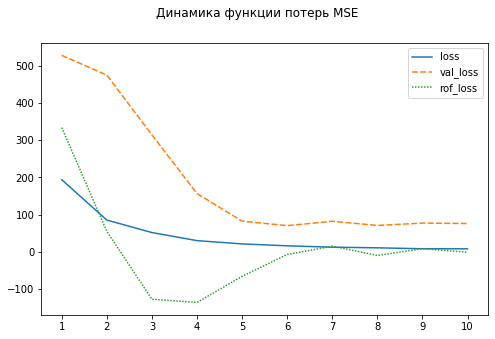

In [15]:
plt.figure(figsize=(8, 5))
plt.suptitle('Динамика функции потерь MSE')
sns.lineplot(data=df[['loss','val_loss','rof_loss']])
plt.xticks(np.linspace(1, 10, 10).astype('int'))

([<matplotlib.axis.XTick at 0x7fdcf01a6090>,
 <a list of 10 Text xticklabel objects>)

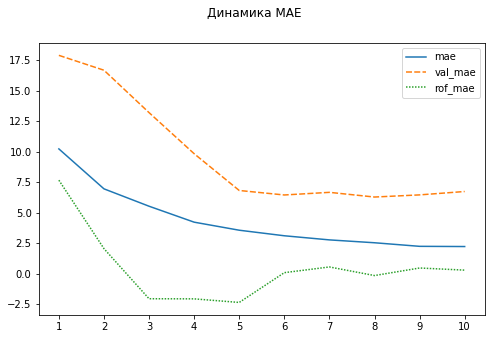

In [16]:
plt.figure(figsize=(8, 5))
plt.suptitle('Динамика MAE')
sns.lineplot(data=df[['mae','val_mae','rof_mae']])
plt.xticks(np.linspace(1, 10, 10).astype('int'))

<h3>Выводы</h3>
<p>От эпохи к эпохе ряды сходятся всё медленнее. Начиная примерно с 5-ой эпохи функция потерь и MAE остаются примерно а таком же уровне, а скорость их сближения на обоих выборках стремится к нулю. Это говорит о том, что обучение достигло своего предела, и метрики более не улучшаются.</p>

<p>Требование ТЗ: MAE меньше 8.0 - выполнено. На валидационной выборке оно составило 6.7374. Данная точность позволит создавать рекомендации для покупателей определенной возратсной группы. Но для контроля добросовестности кассиров при продаже алкоголя - нет, так как модель может ошибиться и перепутать 15-летнего подростка с 22 юношей. </p>
